<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/ml%20algos/_02_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures  # For creating polynomial features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Create a dummy dataset with a quadratic relationship
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature values
y = 3 + 2 * X + 4 * X**2 + np.random.randn(100, 1)  # Quadratic relationship with some noise

In [ ]:
# Converting the data into a DataFrame for visualization
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

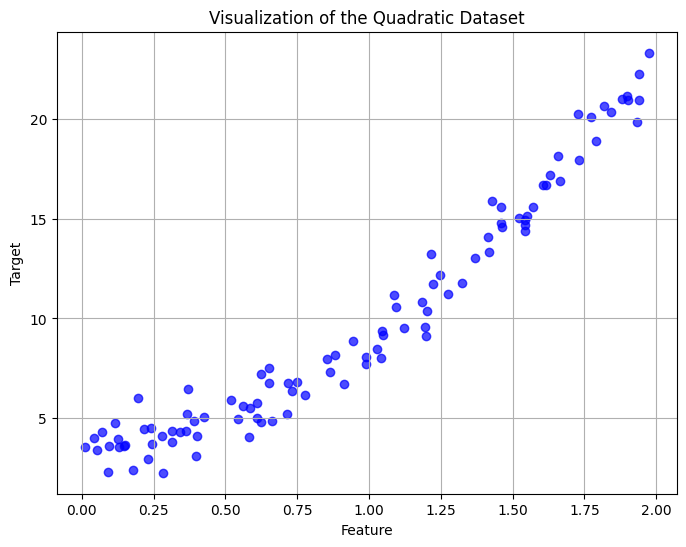

In [ ]:
# Step 2: Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature'], data['Target'], color='blue', alpha=0.7)
plt.title('Visualization of the Quadratic Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Create Polynomial Features
# We create a new feature set that includes the square of the original feature.
poly_features = PolynomialFeatures(degree=2, include_bias=False)  # degree=2 for quadratic
X_poly = poly_features.fit_transform(X)  # Transforms X into [X, X^2]

In [ ]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Linear Regression model on polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Predict and evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")


Mean Squared Error (MSE): 0.636
R-squared (R²) Score: 0.983


In [ ]:
# Step 7: Visualize the Polynomial Regression results
# Sort values for smooth plotting
X_plot = np.sort(X, axis=0)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

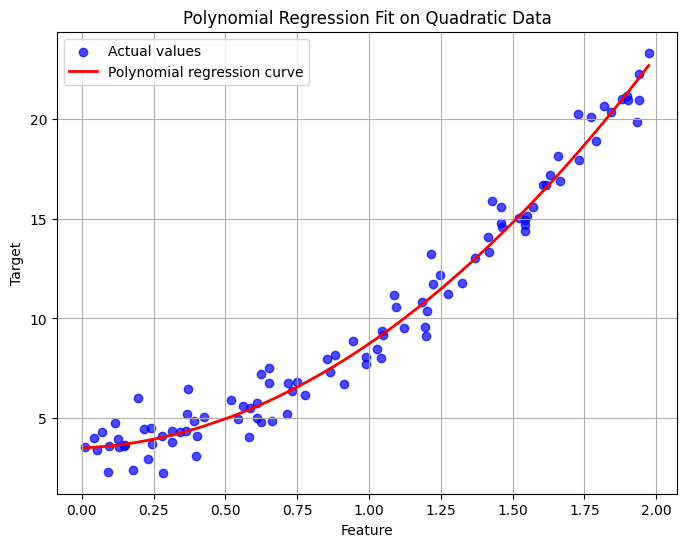

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Actual values')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial regression curve')
plt.title('Polynomial Regression Fit on Quadratic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 8: Heatmap for Evaluating the Model
# Create a DataFrame of actual vs predicted values and calculate the error
eval_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
eval_df['Error'] = eval_df['Actual'] - eval_df['Predicted']

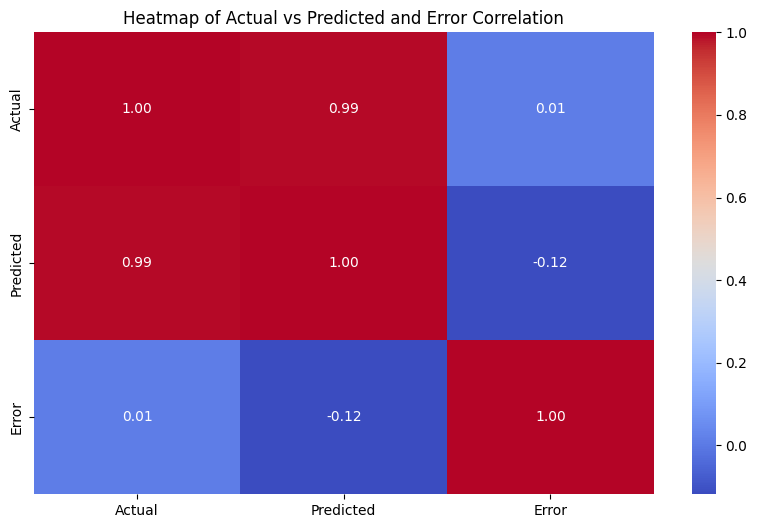

In [ ]:
# Plotting the heatmap to visualize errors
plt.figure(figsize=(10, 6))
sns.heatmap(eval_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Actual vs Predicted and Error Correlation')
plt.show()